In [1]:
!pip install -U accelerate
!pip install -U transformers

In [1]:
import pandas as pd
df = pd.read_csv("/kaggle/input/data-of-tag/articles_training.tsv", usecols=["content", "tags"], sep='\t')
# df = df.sample(frac=0.2, random_state=42)

df['tags'] = df['tags'].fillna('').str.lower()
df['content'] = df['content'].fillna('').str.lower()

df.head()


,content,tags
0,"bước vào trận đấu, barcelona nhanh chóng tràn ...","la liga,sevilla,olimpic lluis companys,đè bẹp,..."
1,willian đi vào lịch sử bóng đá xứ samba. với 1...,"estevao willian,neymar,giải vđqg brazil,serie ..."
2,giải vô địch ná cao su thế giới năm 2024 đã di...,"ná cao su,giải vô địch,giải ba,thượng hải,đồng..."
3,mục tiêu lớn phó thủ tướng chính phủ lê thành ...,"đăng cai,đại hội thể thao châu á,asiad,thể dục..."
4,"ngày 20-10, giải bơi và lặn vô địch quốc gia n...","toàn đoàn,lặn,vũ đặng nhật nam,nguyễn lê truyề..."


In [2]:
df.shape
df.info()

df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99850 entries, 0 to 99849
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  99850 non-null  object
 1   tags     99850 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


729

In [3]:
df = df.drop_duplicates()

df.duplicated().sum()

0

(0.0, 20000.0)

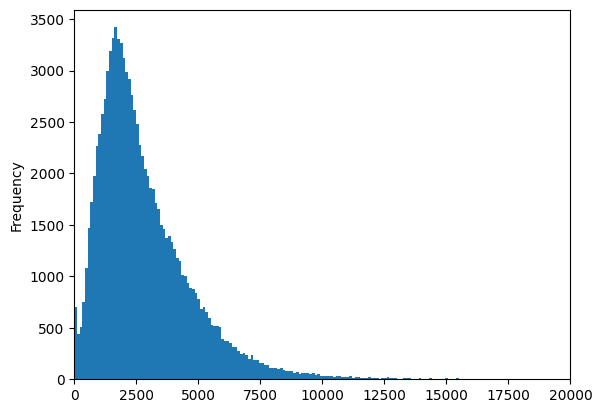

In [4]:
ax = df['content'].str.len().plot.hist(bins=1000)
ax.set_xlim(0, 20000)

In [5]:
df['tags'] = df['tags'].str.split(',')
df['tags'].head()

0    [la liga, sevilla, olimpic lluis companys, đè ...
1    [estevao willian, neymar, giải vđqg brazil, se...
2    [ná cao su, giải vô địch, giải ba, thượng hải,...
3    [đăng cai, đại hội thể thao châu á, asiad, thể...
4    [toàn đoàn, lặn, vũ đặng nhật nam, nguyễn lê t...
Name: tags, dtype: object

In [6]:
tags_counts = [t for tag in df['tags'] for t in tag]
tag_series = pd.Series(tags_counts).value_counts()
frequency_distribution = tag_series.value_counts().sort_index()
print(frequency_distribution)

count
1       61324
2       24364
3       13306
4        8706
5        6390
        ...  
2162        1
2326        1
2394        1
2712        1
7619        1
Name: count, Length: 629, dtype: int64


In [7]:

import pandas as pd

# Đếm tần suất của tất cả các tags
tags_flat = [tag for tags in df['tags'] for tag in tags]  # Giải phẳng danh sách tags
tags_counts = pd.Series(tags_flat).value_counts()  # Đếm tần suất
top_5000_tags = tags_counts.head(5000).index.tolist()  # Lấy 5000 tags phổ biến nhất

# Loại bỏ các tags không phổ biến
def filter_tags(tag_list, popular_tags):
    filtered_tags = [tag for tag in tag_list if tag in popular_tags]
    return ','.join(filtered_tags)

df['filtered_tags'] = df['tags'].apply(lambda x: filter_tags(x, top_5000_tags))

# Lọc những content chứa hơn 2 tags
df['num_tags'] = df['filtered_tags'].apply(lambda x: len(x.split(',')))
filtered_df = df[df['num_tags'] > 2]

# Xóa các cột trung gian nếu không cần thiết
filtered_df = filtered_df.drop(columns=['tags', 'num_tags'])

filtered_df.head()

,content,filtered_tags
0,"bước vào trận đấu, barcelona nhanh chóng tràn ...","la liga,barcelona,raphinha,hansi flick,tỏa sán..."
2,giải vô địch ná cao su thế giới năm 2024 đã di...,"giải ba,đồng đội,vận động viên,nhận giải,thi đ..."
3,mục tiêu lớn phó thủ tướng chính phủ lê thành ...,"đăng cai,thể dục,phấn đấu,thể thao,tầm nhìn,lê..."
4,"ngày 20-10, giải bơi và lặn vô địch quốc gia n...","toàn đoàn,đồng nai,huy chương bạc,huy chương v..."
5,"đồng chí giàng thị dung, phó chủ tịch ubnd tỉn...","lào cai,cuộc họp,sở văn hóa,quyết tâm,bán vé"


In [ ]:
# df['tags'].head()

In [8]:
filtered_df['filtered_tags'] = filtered_df['filtered_tags'].str.split(',')

tags_counts = [t for tag in filtered_df['filtered_tags'] for t in tag]
pd.Series(tags_counts).value_counts()

năm              7537
israel           2711
liên bang nga    2389
tp.hcm           2312
bão              2159
                 ... 
cốm                72
triệu lệ dĩnh      72
tp.thủ đức         72
bình yên           70
phật               58
Name: count, Length: 5000, dtype: int64

In [42]:
# Đếm số lần xuất hiện của các tag và lấy 20 tag phổ biến nhất
top_20_tags = pd.Series(tags_counts).value_counts().head(20)

# Ghép các tag phổ biến nhất thành một chuỗi cách nhau bởi dấu phẩy
top_20_tags_string = ', '.join(top_20_tags.index)

print(top_20_tags_string)

năm, israel, liên bang nga, tp.hcm, bão, điểm chuẩn, xét tuyển, học sinh, giá vàng, ukraine, quốc hội, hezbollah, hội nghị, phạm minh chính, thủ tướng, trúng tuyển, việt, tuyển sinh, đại học, tay vợt


## Label Encoder

In [48]:
from sklearn.preprocessing import MultiLabelBinarizer

In [49]:
multilabel = MultiLabelBinarizer()

labels = multilabel.fit_transform(filtered_df['filtered_tags']).astype('float32')

texts = filtered_df['content'].tolist()

In [12]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# *Go down to the use model section if you have trained the model*

In [13]:
labels
texts[:5]

['bước vào trận đấu, barcelona nhanh chóng tràn lên tấn công nhưng vấp phải sự kháng cự quyết liệt của sevilla. bước ngoặt đến ở phút 22, raphinha bị phạm lỗi trong vòng cấm và trọng tài đã cho barcelona hưởng quả phạt đền. trên chấm 11m, lewandowski đã ghi bàn mở tỷ số cho barcelona. đến phút 28, pedri đã có bàn nhân đôi cách biệt cho đội chủ nhà trước khi lewandowski hoàn tất cú đúp cho riêng mình ở phút 39. hiệp 1 khép lại với tỉ số 3-0 nghiêng về barcelona. sang hiệp 2, các chân sút của barcelona liên tiếp bắn phá khung thành của sevilla nhưng rất tiếc đều rơi vào thế việt vị. tuy nhiên, chỉ trong vòng ít phút từ phút 82 đến 88, các khán giả có mặt trên sân olimpic lluis companys đã được chứng kiến tới 3 bàn thắng. cầu thủ vào sân thay người bên phía barcelona là torre lập cú đúp, xen giữa là bàn thắng danh dự của idumbo bên phía sevilla. chung cuộc, barca thắng sevilal với tỷ số 5-1. như vậy, đoàn quân của hlv hansi flick củng cố vị trí dẫn đầu trên bảng xếp hạng la liga, duy trì 

# Model Building

In [100]:
import torch
from transformers import DistilBertTokenizer, AutoTokenizer
from transformers import DistilBertForSequenceClassification, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset

In [101]:
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels,
                                                                    test_size=0.2, random_state=42)


In [102]:
checkpoint = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(checkpoint)
model = DistilBertForSequenceClassification.from_pretrained(checkpoint, num_labels=len(labels[0]),
                                                            problem_type="multi_label_classification")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
labels[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [18]:
# Lets build custom dataset
class CustomDataset(Dataset):
  def __init__(self, texts, labels, tokenizer, max_len=128):
    self.texts = texts
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    text = str(self.texts[idx])
    label = torch.tensor(self.labels[idx])

    encoding = self.tokenizer(text, truncation=True, padding="max_length", max_length=self.max_len, return_tensors='pt')

    return {
        'input_ids': encoding['input_ids'].flatten(),
        'attention_mask': encoding['attention_mask'].flatten(),
        'labels': label
    }


In [20]:
train_dataset = CustomDataset(train_texts, train_labels, tokenizer)
val_dataset = CustomDataset(val_texts, val_labels, tokenizer)

In [30]:
# val_dataset[0]

In [21]:
# Multi-Label Classification Evaluation Metrics
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, hamming_loss
from transformers import EvalPrediction
import torch


def multi_labels_metrics(predictions, labels, threshold=0.3):
  sigmoid = torch.nn.Sigmoid()
  probs = sigmoid(torch.Tensor(predictions))

  y_pred = np.zeros(probs.shape)
  y_pred[np.where(probs>=threshold)] = 1
  y_true = labels

  f1 = f1_score(y_true, y_pred, average = 'macro')
  roc_auc = roc_auc_score(y_true, y_pred, average = 'macro')
  hamming = hamming_loss(y_true, y_pred)

  metrics = {
      "roc_auc": roc_auc,
      "hamming_loss": hamming,
      "f1": f1
  }

  return metrics

def compute_metrics(p:EvalPrediction):
  preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions

  result = multi_labels_metrics(predictions=preds,
                                labels=p.label_ids)

  return result

In [22]:
# Training Arguments
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    output_dir = './results',
    num_train_epochs=5,
    save_steps=1000,
    save_total_limit=2
)

trainer = Trainer(model=model,
                  args=args,
                  train_dataset=train_dataset,
                  eval_dataset = val_dataset,
                  compute_metrics=compute_metrics)

In [23]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: WARNING Serializing object of type dict that is 147552 bytes
wandb: WARNING Serializing object of type dict that is 147552 bytes
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss
500,0.064900
1000,0.013900
1500,0.013900
2000,0.013500
2500,0.012900
3000,0.012400
3500,0.012000
4000,0.011500
4500,0.011200
5000,0.011000


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0

TrainOutput(global_step=6000, training_loss=0.016572033882141114, metrics={'train_runtime': 6692.6453, 'train_samples_per_second': 57.37, 'train_steps_per_second': 0.897, 'total_flos': 1.38489105911808e+16, 'train_loss': 0.016572033882141114, 'epoch': 5.0})

In [58]:
trainer.evaluate()

AttributeError: `AcceleratorState` object has no attribute `distributed_type`. This happens if `AcceleratorState._reset_state()` was called and an `Accelerator` or `PartialState` was not reinitialized.

In [25]:
trainer.save_model("tags-distilbert-multi-label-model")

In [26]:
import pickle
with open("multi-label-binarizer.pkl", "wb") as f:
  pickle.dump(multilabel, f)

In [27]:
!zip -r distilbert.zip "/kaggle/working/tags-distilbert-multi-label-model"

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: kaggle/working/tags-distilbert-multi-label-model/ (stored 0%)
  adding: kaggle/working/tags-distilbert-multi-label-model/model.safetensors (deflated 8%)
  adding: kaggle/working/tags-distilbert-multi-label-model/training_args.bin (deflated 51%)
  adding: kaggle/working/tags-distilbert-multi-label-model/config.json (deflated 79%)


# Predictions

In [103]:
text = "Năm 2024, Đảng ủy Quân sự huyện Phong Điền đã tham mưu cho Huyện ủy, UBND huyện tập trung lãnh đạo, chỉ đạo đổi mới nội dung, phương pháp thực hiện thắng lợi các mục tiêu, chỉ tiêu, hoàn thành xuất sắc nhiệm vụ đã đề ra. Tham mưu hiệu quả công tác xây dựng lực lượng, hoàn thành tốt công tác tuyển chọn và gọi công dân nhập ngũ năm 2024; tổ chức thành công nhiệm vụ diễn tập chiến đấu trong khu vực phòng thủ các xã: Phong Hòa, Phong Bình, Điền Hải, Điền Môn; nắm chắc tình hình và xử lý kịp thời, chính xác tình hình, không để bị động bất ngờ. Đảng bộ, Đảng ủy xây dựng vững mạnh về tư tưởng, chính trị, đạo đức, lối sống gắn với thực hiện nghiêm túc việc kiểm điểm tự phê bình, phê bình và Chỉ thị 05 của Bộ Chính trị về đẩy mạnh học tập và làm theo tư tưởng, đạo đức, phong cách Hồ Chí Minh; quan tâm đến công tác hậu cần, kỹ thuật; đời sống cán bộ, chiến sĩ… đạt kết quả tốt. Phát biểu tại hội nghị, Bí thư huyện ủy Phong Điền Võ Văn Vui biểu dương những kết quả mà Đảng ủy Quân sự huyện đã đạt được trong năm 2024. Đồng thời yêu cầu nghiêm túc nhìn nhận, đánh giá, kiểm điểm khắc phục những hạn chế còn tồn tại; tiếp tục nêu cao tinh thần đoàn kết trong Đảng bộ, cơ quan, tăng cường nắm tình hình tư tưởng cán bộ, đảng viên"
encoding = tokenizer(text, return_tensors='pt')
encoding.to(trainer.model.device)

outputs = trainer.model(**encoding)
print(outputs)

SequenceClassifierOutput(loss=None, logits=tensor([[-5.1949, -8.6905, -8.4257,  ..., -5.0162, -7.1716, -6.6124]],
       device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [104]:
sigmoid = torch.nn.Sigmoid()
probs = sigmoid(outputs.logits[0].cpu())
preds = np.zeros(probs.shape)
preds[np.where(probs>=0.03)] = 1
print(preds)
len(multilabels.classes_)

[0. 0. 0. ... 0. 0. 0.]


5000

In [105]:
multilabels.classes_

multilabels.inverse_transform(preds.reshape(1,-1))

[('ban thường vụ',
  'bí thư',
  'chủ tịch hđnd',
  'cán bộ',
  'công đoàn',
  'dự thảo',
  'hội nghị',
  'hội viên',
  'người lao động',
  'nhiệm kỳ',
  'năm',
  'phó bí thư',
  'thường trực',
  'thường vụ tỉnh ủy',
  'tp.hcm',
  'tỉnh ủy',
  'viên chức',
  'xiv',
  'đoàn viên',
  'đại hội',
  'đảng',
  'đảng bộ',
  'đảng viên',
  'đồng chí')]

In [29]:
preds.reshape(1,-1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [106]:
import pandas as pd
from IPython.display import clear_output

# Đường dẫn tới các file
input_file = "/kaggle/input/testing-data/articles_testing.tsv"  # File TSV ban đầu
output_file = "nhom11_sol2.tsv"  # File TSV sau khi dự đoán

# Bước 1: Đọc file TSV
df = pd.read_csv(input_file, sep='\t')

# Kiểm tra nếu cột "content" tồn tại
if "content" not in df.columns:
    raise ValueError("Cột 'content' không tồn tại trong file TSV.")

# Lấy nội dung cột content
contents = df['content'].tolist()

# Bước 3: Dự đoán tag cho từng nội dung
predicted_tags = []
i = 1
for text in contents:
    # Tokenize nội dung
    encoding = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    encoding.to(trainer.model.device)
    
    outputs = trainer.model(**encoding)

    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(outputs.logits[0].cpu())
    preds = np.zeros(probs.shape)
    preds[np.where(probs>=0.03)] = 1

    multilabel.classes_

    tags = multilabel.inverse_transform(preds.reshape(1,-1))

    result = ', '.join(tags[0])

    # print(result)
   
    # Thêm tag dự đoán vào danh sách
    predicted_tags.append(result)

    clear_output(wait=True)
    print(f"Tiến trình: {i}/{len(df)}")
    print(result)
    i += 1

# Bước 4: Ghi vào file TSV mới
predicted_tags += ["năm, israel, liên bang nga, tp.hcm, bão, điểm chuẩn, xét tuyển, học sinh, giá vàng, ukraine, quốc hội, hezbollah, hội nghị, phạm minh chính, thủ tướng, trúng tuyển, việt, tuyển sinh, đại học, tay vợt"] * (len(df) - len(predicted_tags))
df['predicted_tag'] = predicted_tags
df.to_csv(output_file, sep='\t', index=False)

print(f"Dự đoán xong! Kết quả đã được lưu vào: {output_file}")

Tiến trình: 43903/43903
biển đông, biển động, bão, bão milton, bão số 6, bão trami, bão trà mi, bắc bộ, cao nhất, công điện, cù lao chàm, cơn bão, cơn bão số 6, cường độ, cục bộ, di chuyển, dự báo, dự báo thời tiết, florida, gió giật, gió mạnh, gió đông, giật, huyện đảo hoàng sa, hướng tây, hướng tây bắc, hướng đông, khí tượng, không khí lạnh, kinh tuyến, kon tum, lũ quét, lượng mưa, lốc xoáy, miền bắc, miền trung, mưa, mưa dông, mưa lớn, mưa rào, mưa rào và dông, mưa to, nam hà tĩnh, ngập lụt, nhiều mây, nhẫn, philippines, phía đông, quảng bình, quảng nam, quảng ngãi, quần đảo hoàng sa, rét, rải rác, suy yếu, sóng biển, sơ tán, sạt lở, sức gió, thời tiết, thừa thiên huế, tin bão, trami, trung bộ, trà mi, tàu thuyền, tâm bão, tây nam, tăng cấp, vài nơi, vùng biển, áp thấp nhiệt đới, đà nẵng, đông bắc, đảo cù lao chàm, đảo cồn cỏ, đảo luzon, đất liền, đổ bộ, đổi hướng, độ kinh đông, độ vĩ bắc, ứng phó
Dự đoán xong! Kết quả đã được lưu vào: nhom11_sol2.tsv


# Use Model

In [35]:
from transformers import TrainingArguments

# Giả sử bạn đã có đối tượng `training_args`
training_args = TrainingArguments(output_dir="/kaggle/working/tags-distilbert-multi-label-model/training_args.bin")

# Truy cập các tham số huấn luyện
print(f"Epochs: {training_args.num_train_epochs}")
print(f"Batch size: {training_args.per_device_train_batch_size}")
print(f"Learning rate: {training_args.learning_rate}")
print(f"Logging steps: {training_args.logging_steps}")

Epochs: 3.0
Batch size: 8
Learning rate: 5e-05
Logging steps: 500


In [36]:
import numpy as np
import torch
from transformers import DistilBertTokenizer, AutoTokenizer
from transformers import DistilBertForSequenceClassification, AutoModelForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained("/kaggle/working/tags-distilbert-multi-label-model/config.json")
model = DistilBertForSequenceClassification.from_pretrained("/kaggle/working/tags-distilbert-multi-label-model", local_files_only=True)


/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2110: FutureWarning: Calling DistilBertTokenizer.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  warnings.warn(


In [37]:
text = "Năm 2024, Đảng ủy Quân sự huyện Phong Điền đã tham mưu cho Huyện ủy, UBND huyện tập trung lãnh đạo, chỉ đạo đổi mới nội dung, phương pháp thực hiện thắng lợi các mục tiêu, chỉ tiêu, hoàn thành xuất sắc nhiệm vụ đã đề ra. Tham mưu hiệu quả công tác xây dựng lực lượng, hoàn thành tốt công tác tuyển chọn và gọi công dân nhập ngũ năm 2024; tổ chức thành công nhiệm vụ diễn tập chiến đấu trong khu vực phòng thủ các xã: Phong Hòa, Phong Bình, Điền Hải, Điền Môn; nắm chắc tình hình và xử lý kịp thời, chính xác tình hình, không để bị động bất ngờ. Đảng bộ, Đảng ủy xây dựng vững mạnh về tư tưởng, chính trị, đạo đức, lối sống gắn với thực hiện nghiêm túc việc kiểm điểm tự phê bình, phê bình và Chỉ thị 05 của Bộ Chính trị về đẩy mạnh học tập và làm theo tư tưởng, đạo đức, phong cách Hồ Chí Minh; quan tâm đến công tác hậu cần, kỹ thuật; đời sống cán bộ, chiến sĩ… đạt kết quả tốt. Phát biểu tại hội nghị, Bí thư huyện ủy Phong Điền Võ Văn Vui biểu dương những kết quả mà Đảng ủy Quân sự huyện đã đạt được trong năm 2024. Đồng thời yêu cầu nghiêm túc nhìn nhận, đánh giá, kiểm điểm khắc phục những hạn chế còn tồn tại; tiếp tục nêu cao tinh thần đoàn kết trong Đảng bộ, cơ quan, tăng cường nắm tình hình tư tưởng cán bộ, đảng viên"
encoding = tokenizer(text, return_tensors='pt')
encoding.to(model.device)

outputs = model(**encoding)
print(outputs)

SequenceClassifierOutput(loss=None, logits=tensor([[-6.7141, -8.0356, -6.7286,  ..., -5.2908, -6.6661, -4.2423]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [40]:
sigmoid = torch.nn.Sigmoid()
probs = sigmoid(outputs.logits[0].cpu())
preds = np.zeros(probs.shape)
preds[np.where(probs>=0.01)] = 1
print(preds)
len(multilabel.classes_)

[0. 0. 0. ... 0. 0. 1.]


5000

In [41]:
multilabel.classes_

multilabel.inverse_transform(preds.reshape(1,-1))

[('australia',
  'brics',
  'bầu cử',
  'chủ tịch nước',
  'cử tri',
  'giải thưởng',
  'hai nước',
  'hàn quốc',
  'hội nghị',
  'hợp tác',
  'khai mạc',
  'kỷ nguyên',
  'liên bang nga',
  'liên minh châu âu',
  'lào',
  'nam định',
  'nhật bản',
  'năm',
  'online',
  'phạm minh chính',
  'saudi arabia',
  'thái lan',
  'thảo luận',
  'thủ tướng',
  'tp.hcm',
  'trung quốc',
  'ttxvn',
  'tô lâm',
  'tổng thống',
  'việt',
  'vàng',
  'đại sứ',
  'ấn độ',
  'ứng viên')]

In [90]:
import pandas as pd

# Đường dẫn tới các file
input_file = "/kaggle/input/testing-data/articles_testing.tsv"  # File TSV ban đầu
output_file = "nhom11_sol1.tsv"  # File TSV sau khi dự đoán

# Bước 1: Đọc file TSV
df = pd.read_csv(input_file, sep='\t')

# Kiểm tra nếu cột "content" tồn tại
if "content" not in df.columns:
    raise ValueError("Cột 'content' không tồn tại trong file TSV.")

# Lấy nội dung cột content
contents = df['content'].tolist()

# Bước 3: Dự đoán tag cho từng nội dung
predicted_tags = []
for text in contents:
    # Tokenize nội dung
    encoding = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    encoding.to(model.device)
    
    outputs = model(**encoding)

    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(outputs.logits[0].cpu())
    preds = np.zeros(probs.shape)
    preds[np.where(probs>=0.007)] = 1

    multilabel.classes_

    tags = multilabel.inverse_transform(preds.reshape(1,-1))

    result = ', '.join(tags[0])
    
    print(result)
   
    # Thêm tag dự đoán vào danh sách
    predicted_tags.append(result)

# Bước 4: Ghi vào file TSV mới
df['predicted_tag'] = predicted_tags
df.to_csv(output_file, sep='\t', index=False)

print(f"Dự đoán xong! Kết quả đã được lưu vào: {output_file}")


biên giới, bất động sản, bầu cử, bộ công thương, chuyển đổi, cập nhật, cử tri, dữ liệu, hàn quốc, hội nghị, hợp tác, lào, ngân hàng, năm, phạm minh chính, thúc đẩy, thương mại điện tử, thủ tướng, thủ tướng chính phủ, toàn cầu, tp.hcm, trung quốc, trí thông minh nhân tạo, ttxvn, tăng trưởng, việt
bầu cử, bộ công thương, cập nhật, cử tri, dữ liệu, hàn quốc, hợp tác, năm, phạm minh chính, thương mại điện tử, thủ tướng, toàn cầu, trung quốc, trí thông minh nhân tạo, ttxvn, việt
bầu cử, bộ công thương, cập nhật, cử tri, dữ liệu, hàn quốc, hợp tác, năm, phạm minh chính, thương mại điện tử, thủ tướng, toàn cầu, tp.hcm, trung quốc, trí thông minh nhân tạo, ttxvn, việt
biên giới, bầu cử, bộ công thương, cập nhật, cử tri, dữ liệu, hàn quốc, hội nghị, hợp tác, lào, ngân hàng, năm, phạm minh chính, thúc đẩy, thương mại điện tử, thủ tướng, thủ tướng chính phủ, toàn cầu, tp.hcm, trung quốc, trí thông minh nhân tạo, ttxvn, tăng trưởng, việt, yagi
biên giới, bất động sản, bầu cử, bộ công thương, chuyể

KeyboardInterrupt: 

In [99]:
df.to_csv(output_file, sep='\t', index=False)

In [94]:
df["predicted_tags"] = [""] * len(df)  # Khởi tạo cột mặc định
df.loc[:len(predicted_tags), "predicted_tags"] = predicted_tags  # Gán kết quả

ValueError: Must have equal len keys and value when setting with an iterable

In [95]:
print(len(df))             # Số hàng trong DataFrame
print(len(predicted_tags)) # Số phần tử trong danh sách bạn muốn gán

43903
11766


In [97]:
predicted_tags += ["'biên giới, bất động sản, bầu cử, bộ công thương, chuyển đổi, cập nhật, cử tri, dữ liệu, hàn quốc, hội nghị, hợp tác, lào, ngân hàng, năm, phạm minh chính, thúc đẩy, thương mại điện tử, thủ tướng, thủ tướng chính phủ, toàn cầu, tp.hcm, trung quốc, trí thông minh nhân tạo, ttxvn, tăng trưởng, việt'"] * (len(df) - len(predicted_tags))

In [98]:
df["predicted_tags"] = predicted_tags

NameError: name 'predicted_tags' is not defined